# The finite difference time domain method (FDTD) in two dimensions mit Perfectly Matched Layers (PML)
[Davidson, D. B. (2010). Computational electromagnetics for RF and microwave engineering. Cambridge University Press.]_

1. [Electromagnetiv scattering problems](#El_sca)
2. [Including a source: the scattered/total field formulation](#In_source)
3. [Perfectly matched Layer](#PML)
4. [Historical Background: The Berenger´s split field formulation](#Berenger)
5. [The FDTD update equations for a PML](#UpdateEq)
6. [Simulation](#Sim)

<a id='El_sca'></a>
## 1. Electromagnetiv scattering problems

When an electromagnetic field encounters a target, currents are excited on it, which in turn re-radiate. This process is called “electromagnetic scattering”. Since the Maxwell equations are linear the fields are often decomposed into an _incident_ field $E^{inc}$ and a _scattered_ field $E^{scat}$. The overall field, called the _total_ field $E^{tot}$, is then:
$$E^{tot} = E^{inc}+E^{scat}$$
By definition, the incident field is the field which would exist if the scatterer were absent.

<div style="align: left; text-align:center;">
  <img src="Fig3_2_Davidson.png" alt="Drawing" style="width: 400px;">
  <figcaption> <strong>Fig. 1</strong> The scatterer and surrounding FDTD zones, showing scattered field and total field regions </figcaption>
</div>

<a id='In_source'></a>
## 2. Including a source: the scattered/total field formulation

If we want to study scattering, we need a method for simulating a plane wave. The simplest method for doing this is to exploit the concepts of incident, scattered and total fields, introduced in the section above. Since the Maxwell equations are linear we can use the FDTD to solve for either the scattered or total fields. We will split the computational area into two zones using a (non-physical) line, as in Fig. 1. 
In one region, we will have only scattered fields, and in the other, total fields. For convenience, we can choose a constant $x$ coordinate (this corresponds to the variable `L` in the simulation code).

Since three of the five field components in the two-dimensional Yee cell are located at half-step
values, our scattered/total field demarcation is located at
$x_L = (L - \frac{1}{2})\Delta$. Fields located _on_ and to the right of this line this will be chosen as
total fields. Fields to the left will be scattered fields.

<a id='PML'></a>
## 3. Perfectly matched Layer

The perfectly matched layer (PML) is the theoratical approach for the boundary in sumulating an open field. The "real" open field would not have any boundary. With the FDTD we need a boundary conditions to be able to do a simulation. The perfect boundary for the simluation would absorbe all incoming waves. The PML is an effective approach to simulate such an absorbing boundary.

<a id='Berenger'></a>
## 4. Historical Background: The Berenger´s split field formulation

The Berenger´s split field formulation is the simplest and most efficient approach in two dimensions. The reason for this is that, contrary to the (Uniaxial) UPML, we can avoid the storage requirements of electric and magnetic flux vectors and the additional complexity due to dealing with dispersive materials. It is important to note that this benefit accrues only in two dimensions.

Berenger recognized that an additional degree of freedom would permit a match off normal as well. He did this by splitting the transverse fields into two orthogonal components, for example $H_z = H_{zx} + H_{zy}$. Applying this to a two-dimensional TE problem described by the Maxwell-equations with lossless materials _(Eq: 3.5 - 3.7)_:

$$\frac{\partial E_x}{\partial t} = \frac{1}{\epsilon}\frac{\partial H_z}{\partial y}$$

$$\frac{\partial E_y}{\partial t} = -\frac{1}{\epsilon}\frac{\partial H_z}{\partial x}$$

$$\frac{\partial H_z}{\partial t} = \frac{1}{\mu} \biggl(\frac{\partial E_x}{\partial y} - \frac{\partial E_y}{\partial x} \biggl)$$

result in four equations:

$$\frac{\partial E_x}{\partial t} = \frac{1}{\epsilon} \frac{\partial (H_{zx} + H_{zy})}{\partial y}$$

$$\frac{\partial E_y}{\partial t} = -\frac{1}{\epsilon} \frac{\partial (H_{zx} + H_{zy})}{\partial x}$$

$$\frac{\partial H_{zx}}{\partial t} = -\frac{1}{\mu}\frac{\partial E_y}{\partial x}$$

$$\frac{\partial H_{zy}}{\partial t} = \frac{1}{\mu}\frac{\partial E_x}{\partial y}$$

<a id='UpdateEq'></a>
## 5. The FDTD update equations for a PML

With the theoretical background, associated with two components of $\sigma^*$ ($\sigma_x^*$ and $\sigma_y^*$) and two components of $\sigma$ ($\sigma_x$ and $\sigma_y$), describing the electrical ($\sigma$) and magnetic ($\sigma^*$) loss, the time domain equations are _(Eq.: 3.58 - 3.61)_:

$$ \biggl( \epsilon \frac{\partial}{\partial t}+\sigma_y \biggl) E_x = \frac{\partial(H_{zx}+H_{zy})}{\partial y}$$

$$ \biggl( \epsilon \frac{\partial}{\partial t}+\sigma_x \biggl) E_x = -\frac{\partial(H_{zx}+H_{zy})}{\partial x}$$

$$ \biggl( \mu \frac{\partial}{\partial t}+\sigma_x^* \biggl) H_zx = -\frac{\partial E_y}{\partial x}$$

$$ \biggl( \mu \frac{\partial}{\partial t}+\sigma_y^* \biggl) H_zy = \frac{\partial E_x}{\partial y}$$

To evaluate the electric field, we use the _semi-implicit_ approximation. It is needed, because of the problem of evaluating the electric field at a half time step. The required value is computed as the average of the previous (known) value and the as-yet-to-be-computed value:

$$E_x\biggl(i+\frac{1}{2},j,n+\frac{1}{2}\biggl)= \frac{E_x(i+\frac{1}{2},j,n+1)+E_x(i+\frac{1}{2},j,n)}{2}$$

Using this approximation, and otherwise proceeding as before, the result is the following set of update equations _(Eq.: 3.63 - 3.66)_:

$$H_{zx}(i,j,n)=D_{a_{Hzx}}(i,j)\cdot H_{zx}(i,j,n-1)-D_{b_{Hzx}}(i,j)\cdot [E_y(i+1,j,n) - E_y(i,j,n)]$$

$$H_{zy}(i,j,n)=D_{a_{Hzy}}(i,j)\cdot H_{zy}(i,j,n-1)-D_{b_{Hzy}}(i,j)\cdot [E_x(i,j+1,n) - E_x(i,j,n)]$$

$$E_x(i,j,n+1)=C_{a_{Ex}}(i,j)\cdot E_{x}(i,j,n)+C_{b_{Ex}}(i,j)\cdot [H_z(i,j,n) - H_z(i,j-1,n)]$$

$$E_y(i,j,n+1)=C_{a_{Ey}}(i,j)\cdot E_y(i,j,n)-C_{b_{Ey}}(i,j)\cdot [H_z(i,j,n) - H_z(i-1,j,n)]$$

, where we have combined the $H$ field _(Eq.:3.67)_:

$$H_z(i,j,n) = H_{zx}(i,j,n)+H_{zy}(i,j,n)$$

and the material constants as _(Eq.:3.68 - 3.75)_:

$$C_{a_{Ex}} (i,j) = \frac{1 - \frac{\sigma_y(i,j)\Delta t}{2\epsilon(i,j)}}{1+ \frac{\sigma_y(i,j)\Delta t}{2 \epsilon (i,j)}} \qquad \qquad \qquad 
C_{b_{Ex}} (i,j) = \frac{\frac{\Delta t}{\epsilon(i,j) \Delta y}}{1+ \frac{\sigma_y(i,j)\Delta t}{2 \epsilon (i,j)}}$$

$$C_{a_{Ey}} (i,j) = \frac{1 - \frac{\sigma_x(i,j)\Delta t}{2\epsilon(i,j)}}{1+ \frac{\sigma_x(i,j)\Delta t}{2 \epsilon (i,j)}} \qquad \qquad \qquad
C_{b_{Ey}} (i,j) = \frac{\frac{\Delta t}{\epsilon(i,j) \Delta x}}{1+ \frac{\sigma_x(i,j)\Delta t}{2 \epsilon (i,j)}}$$

$$D_{a_{Hzx}}(i,j) = \frac{1 - \frac{\sigma_x^*(i,j)\Delta t}{2\mu(i,j)}}{1+ \frac{\sigma_x^*(i,j)\Delta t}{2 \mu (i,j)}} \qquad \qquad \qquad
D_{b_{Hzx}} (i,j) = \frac{\frac{\Delta t}{\mu (i,j) \Delta x}}{1+ \frac{\sigma_x^*(i,j)\Delta t}{2 \mu (i,j)}}$$

$$D_{a_{Hzy}} (i,j) = \frac{1 - \frac{\sigma_y^*(i,j)\Delta t}{2\mu (i,j)}}{1+ \frac{\sigma_x^*(i,j)\Delta t}{2 \mu (i,j)}} \qquad \qquad \qquad
D_{b_{Hzy}} (i,j) = \frac{\frac{\Delta t}{\mu(i,j) \Delta y}}{1+ \frac{\sigma_y^*(i,j)\Delta t}{2 \mu (i,j)}}$$

<a id='Sim'></a>
## 6. [Simulation](./PML_JTJT.ipynb)
The code allows to simulate different scenarios. The simulation region is defined by the the steps and the spatial distance of each step. In this region we can place a line source, plane wave and a PEC cylinder and/or PEC cuboid. The choosen area will be plottet later on.

The line source and the plane wave is a normalized Gaussian derivative pulse (Eq.: 3.41):
$$v_0(t) = - \frac{e^{1/2}}{\sigma}(t-m)e^{-(t-m)^2/2\sigma^2}$$
The normalizing constant $e^{1/2}/\sigma$ provides a unit peak amplitude at $t - m = ± \sigma$.

### Simulation parameters
#### PEC-Objects
- Cylinder `cube_present = false; cyl_present = true;`
- Cuboid `cube_present = true; cyl_present = false;`
- Cylinder and cuboid `cube_present = true; cyl_present = true;`

#### Source
- Line-source `line_source = true`
- Plane wave `line_source = false`

#### Parameters
- Simulation region `sizeX;sizeY` [m]
- Refinement of the simulation region `refinement` [cells/m]
- Number of time steps `M`
- Border of scattered and total field boundary `L`
- Position of cylinder `N_centre_x;N_centre_y`
- Radius of cylinder `radius` [m]
- Position of cuboid `N_centre_x_cub;N_centre_y_cub`
- length and width of cuboid `sides`[m]

In [1]:
using GeometryBasics
using CairoMakie
using Plots

In [2]:
# The linesource is a basic test model for the simulation, if the value is false a plane-wave is generated on the SF/TF interface.
# It can be used to test the PML and simulate the circular propagation of the wave.
# The linesource by it selfe acts as a PEC.
line_source = true;
# PEC objects as scatter-objects.
# If both objects should be present in one simulation theier position should be modified in the following.
cyl_present = false;
cube_present = false;

In [3]:
# Physical constants
c = 2.997925e8;           # [m/s] Speed of light in vacuum
eps_0 = 8.854187817e-12;  # [F/m] ϵ_0
mu_0 = 4*pi*1e-7;         # [H/m] μ_0
eta_0 = sqrt(mu_0/eps_0);

In [4]:
# Simulation area
# Size in x and y direction can be changed.
# For increased x diraction the simulation time might be to small
sizeX = 1      # [m] size of simulation region
sizeY = 2      # [m] size of simulation region
# Refinement is sufficient with 200 cells/m.
refinement = 200    # [cells/m] 
N_x = Int(refinement*sizeX)      # number of cells in x-direction
N_y = Int(refinement*sizeY)      # number of cells in y-direction
# Number of time steps determines the simulation time. 
# If the simulation area is increased in x direction this value has to be modified.
M = 350                   # Number of time steps
# SF/TF can be moved to any value from 0 to N_x
L = Int(round(N_x/2))    # scat/tot field boundary 

delta_s = sizeX/N_x       # [m] spatial step   
R = 1                                 # fraction of Courant limit. Must be <= 1
delta_t = R * delta_s/(c * sqrt(2))   # [s] Time step size
sigma = 5.0e-11      # Controls spectral content of Gaussian derivative pulse equals 1/omega_max

# Plane wave starts with an offset. Line source starts directly.
m_offset = 4*sigma;  # Controls switch-on time
Peak = 1;            # Peak amplitude of E field

# PEC cylinder position at x=0.75m y=0.5m.
radius = 0.03 # [m] radius of cylinder
N_centre_x = Int(round(0.75*N_x));
N_centre_y = Int(round(0.6*N_y));
# PEC Cube position at 
sides = 0.1  # [m] side length of cube
N_centre_x_cub = Int(round(0.75*N_x));
N_centre_y_cub = Int(round(0.3*N_y));

# Set up storage for time histories in singele point.
H_z_point1 = zeros(1,M);
E_y_point1 = zeros(1,M);
# Position of point can be modified, but has to be in simulation region.
point1_x = Int(round(0.6*N_x));
point1_y = Int(round(N_y/2));

In [5]:
# Set up material grid (free space to start)
sigma_x = zeros(N_x,N_y);
sigma_y = zeros(N_x,N_y);
sigma_ast_x = zeros(N_x,N_y);
sigma_ast_y = zeros(N_x,N_y);

In [6]:
# Set up PML
poly_m = 3
sigma_max = 0.8*(poly_m+1)/(eta_0*delta_s)
d_cell = 10
# For y-absorption.
for jj = 1:d_cell
    dist = d_cell-(jj-1)
    sigma_y[:,jj] .= sigma_max*(dist/d_cell)^poly_m
    sigma_y[:,N_y-jj+1] = sigma_y[:,jj]
end

for jj = 1:d_cell
    dist = d_cell-(jj-1)-0.5; # Hz field components located delta/2 away.
    sigma_ast_y[:,jj] .= eta_0^2*sigma_max*(dist/d_cell)^poly_m;
    sigma_ast_y[:,N_y-jj] = sigma_ast_y[:,jj];
end

# For x-absorption. Corner regions are automatically overlapped.
for ii = 1:d_cell
    dist = d_cell-(ii-1);
    sigma_x[ii,:] .= sigma_max*(dist/d_cell)^poly_m;
    sigma_x[N_x-ii+1,:] = sigma_x[ii,:];
end

for ii = 1:d_cell
    dist = d_cell-(ii-1)-0.5; # Hz field components located delta/2 away.
    sigma_ast_x[ii,:] .= eta_0^2*sigma_max*(dist/d_cell)^poly_m;
    sigma_ast_x[N_x-ii,:] = sigma_ast_x[ii,:];
end

In [7]:
C_aEx = (1 .- sigma_y * delta_t / (2*eps_0)) ./ (1 .+sigma_y*delta_t/(2*eps_0)); 
C_bEx = delta_t / (eps_0*delta_s) ./ (1 .+ sigma_y * delta_t / (2*eps_0));
C_aEy = (1 .-sigma_x*delta_t/(2*eps_0))./(1 .+sigma_x*delta_t/(2*eps_0)); 
C_bEy = delta_t/(eps_0*delta_s)./(1 .+sigma_x*delta_t/(2*eps_0));
D_aHzx = (1 .-sigma_ast_x*delta_t/(2*mu_0))./(1 .+sigma_ast_x*delta_t/(2*mu_0)); 
D_bHzx = delta_t/(mu_0*delta_s)./(1 .+sigma_ast_x*delta_t/(2*mu_0));
D_aHzy = (1 .-sigma_ast_y*delta_t/(2*mu_0))./(1 .+sigma_ast_y*delta_t/(2*mu_0)); 
D_bHzy = delta_t/(mu_0*delta_s)./(1 .+sigma_ast_y*delta_t/(2*mu_0));

# Modifiy simulation region if cylinder is present.
if cyl_present 
    for ii = 1:N_x
        for jj = 1:N_y
            if (sqrt(((ii-1/2-(N_centre_x-1))*delta_s)^2 + ((jj-1-(N_centre_y-1))*delta_s)^2 ) <= radius) 
                C_bEx[ii,jj] = 0;
            end
            if (sqrt(((ii-1-(N_centre_x-1))*delta_s)^2 + ((jj-1/2-(N_centre_y-1))*delta_s)^2 ) <= radius) 
                C_bEy[ii,jj] = 0;
            end
        end
    end
end 

# Modifiy simulation region if cube is present.
if cube_present 
    for x = N_centre_x_cub-Int(sides/(delta_s*2)):N_centre_x_cub+Int(sides/(delta_s*2))
        for y = N_centre_y_cub-Int(sides/(delta_s*2)):N_centre_y_cub+Int(sides/(delta_s*2)) 
            if y < N_centre_y_cub+Int(sides/(delta_s*2))
                C_bEy[x,y] = 0;
            end
            if x < N_centre_x_cub+Int(sides/(delta_s*2))
                C_bEx[x,y] = 0;
            end
        end
    end
end 

In [8]:
# Visualisation of selected simulation region. 
# This cell is just for visualisation and will not affect the simulation.

sim_region = Figure()
Axis(sim_region[1, 1], aspect = DataAspect(), title="Simulation region")
up_L=poly!(Rect(0,L,N_y,L), color = :grey)
un_L=poly!(Rect(0,0,N_y,L), color = :black)

if cyl_present
    Cyl =poly!(Circle(Point2f0(
        N_centre_y, N_centre_x),
        radius/delta_s),
        color = :orange,
        strokecolor = :black,
        strokewidth = 1
    )
end

if cube_present
    poly!(Rect(N_centre_y_cub,N_centre_x_cub,sides/delta_s,sides/delta_s), 
        color=:orange,
        strokecolor = :black,
        strokewidth = 1
    )
end

meas=poly!(Circle(Point2f0(point1_y, point1_x), 1), color = :red)
Legend(
    sim_region[1, 2],
    [up_L, un_L, Cyl, meas],
    ["Total field", "Scattered Field", "PEC", "Point of time history"]
)
sim_region

LoadError: UndefVarError: Cyl not defined

In [9]:
# Pulse of incident wave.
# Normalized gaussian derivative pulse.
function gaussder_norm(t,m,sigma)
    y = -exp(0.5)*(t-m)/sigma*exp(-(t-m)^2/(2*sigma^2))
    return y
end

gaussder_norm (generic function with 1 method)

In [10]:
# First time step - Initialize values for H_z, E_x and E_y
H_zx_nmin1 = zeros(N_x,N_y); 
H_zy_nmin1 = zeros(N_x,N_y); 
E_x_nmin1 = zeros(N_x,N_y); 
E_y_nmin1 = zeros(N_x,N_y); 

# Pre-allocation
H_zx_n = zeros(N_x,N_y); 
H_zy_n = zeros(N_x,N_y); 
H_z_n = zeros(N_x,N_y); 
E_x_n = zeros(N_x,N_y); 
E_y_n = zeros(N_x,N_y);
E_y_ninc = zeros(N_y);
H_z_ninc = zeros(N_y);

movieH = []

# Time loop
for m = 2:M   
    # Update H fields: 
    H_zx_n[1:N_x-1,1:N_y-1] = D_aHzx[1:N_x-1,1:N_y-1].*H_zx_nmin1[1:N_x-1,1:N_y-1] - 
        D_bHzx[1:N_x-1,1:N_y-1] .* (E_y_nmin1[2:N_x,1:N_y-1] - E_y_nmin1[1:N_x-1,1:N_y-1])
    H_zy_n[1:N_x-1,1:N_y-1] = D_aHzy[1:N_x-1,1:N_y-1].*H_zy_nmin1[1:N_x-1,1:N_y-1] + 
        D_bHzy[1:N_x-1,1:N_y-1] .* (E_x_nmin1[1:N_x-1,2:N_y] - E_x_nmin1[1:N_x-1,1:N_y-1])
    
    if line_source 
        # Hard line source as test-function for PML and scattering.
        # It acts as PEC for scattered waves.
        H_z_n = H_zx_n+H_zy_n
        H_z_n[L,Int(N_y/2)] = 1/50*gaussder_norm((m-1)*delta_t,m_offset,sigma)
    else 
        # Incident plane wave.
        # Only updating the H_zx_n component.        
        E_y_nmin1_inc = ones(1,N_y)*Peak*gaussder_norm(
            (m-1)*delta_t - (L-1)*delta_s/c,m_offset,sigma
        )
        H_zx_n[L,1:N_y-1] += D_bHzx[L,1:N_y-1] .* E_y_nmin1_inc[1:N_y-1]
        H_z_n = H_zx_n+H_zy_n
    end
    
    # Update E fields: note that latest H fields must be used.
    E_x_n[2:N_x,2:N_y] = C_aEx[2:N_x,2:N_y] .* E_x_nmin1[2:N_x,2:N_y] + 
        C_bEx[2:N_x,2:N_y] .* (H_z_n[2:N_x,2:N_y] - H_z_n[2:N_x,1:N_y-1])
    E_y_n[2:N_x,2:N_y] = C_aEy[2:N_x,2:N_y] .* E_y_nmin1[2:N_x,2:N_y] - 
        C_bEy[2:N_x,2:N_y] .* (H_z_n[2:N_x,2:N_y] - H_z_n[1:N_x-1,2:N_y])

    if !line_source 
        # Special update on scat/tot field boundary for plane wave (only needed for Ey)
        H_z_n_inc = ones(1,N_y)*(Peak/eta_0)*gaussder_norm((m-1/2)*delta_t - (L-1/2)*delta_s/c,m_offset,sigma)
        E_y_n[L,2:N_y] += C_bEy[L,2:N_y] .* H_z_n_inc[2:N_y]
    end
    
    # Fix outer values of E_tangential as PEC.
    E_y_n[1,:] .= 0
    E_y_n[N_x,:] .= 0
    E_x_n[:,1] .= 0
    E_x_n[:,N_y] .= 0

    # Movie
    push!(movieH, (eta_0 .* H_z_n))
    
    #Time history
    H_z_point1[m] = H_z_n[point1_x,point1_y]
    E_y_point1[m] = E_y_n[point1_x,point1_y]
    
    # Update for next iteration
    H_zx_nmin1 = H_zx_n
    H_zy_nmin1 = H_zy_n
    E_x_nmin1 = E_x_n
    E_y_nmin1 = E_y_n
end

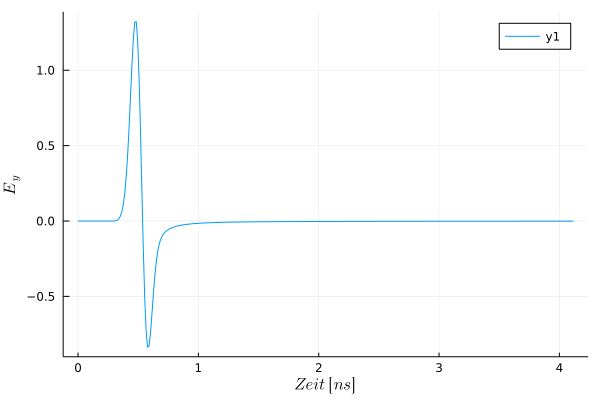

In [11]:
# Plot of time history of selcted location.
time=(range(0,M-1, step=1) |> collect)*delta_t
Plots.plot(time/1e-9,transpose(E_y_point1))
Plots.xlabel!(L"Zeit \ [ns]")
Plots.ylabel!(L"E_y")

In [ ]:
# Visualisation of H_z component
plotsizeX = 400*sizeX      # plot sizeX depends on size of simulation region
plotsizeY = 400*sizeY      # plot sizeX depends on size of simulation region
anim = @animate for i in 1:5:length(movieH)
    Plots.plot(
        [1:N_y],[1:N_x],
        movieH[i],
        st=:surface,
        camera=(0,90),     # topview is simulated, alternative view (30,45) 
        zlim=(-1,1),       # if the values of H_z are increased these values should be modified 
        colorbar=false, 
        size=(plotsizeY, plotsizeX),
        axis=nothing
    )
    Plots.title!("Propagation of the simulated TE-Wave")
end
gif(anim, fps=10)